# Уровень заработной платы

#### **Информация о данных**

Используемый набор данных является выборкой из базы данных переписи населения 1994 года, сделанной Барри Беккером. Датасет содержит следующие признаки:

1. **Возраст** (`age`): отражает возраст респондента (от 17 до 90 лет).
2. **Рабочий класс** (`workclass`): отражает статус занятости респондента.
3. **Оценка уникальности** (`fnlwgt`): отражает примерную оценку количества людей, которое представляет каждая строка данных.
4. **Образование** (`education`): отражает уровень образования респондента.
5. **Ступень образования** (`education-num`): отражает статус образования от дошкольного до докторантуры (от 1 до 16).
6. **Семейное положение** (`marital-status`): отражает семейное положение респондента.
7. **Сфера занятости** (`occupation`): отражает сферу занятости респондента.
8. **Семейная роль** (`relationship`): отражает роль в семье респондента.
9. **Раса** (`race`): отражает расовую принадлежность респондента.
10. **Пол** (`sex`): отражает пол респондента (мужчина, женщина).
11. **Прирост капитала** (`capital-gain`): отражает увеличение капитала у респондента.
12. **Потеря капитала** (`capital-loss`): отражает уменьшение капитала у респондента.
13. **Трудоспособность** (`hours-per-week`): отражает количество отработанных часов за неделю (от 1 до 99).
14. **Страна рождения** (`native-country`): отражает страну, в которой родился респондента.
15. **Зарплата** (`salary`): отражает уровень заработной платы респондента (<=50K, >50K).

#### ***Описание задачи***

*Задача заключается в прогнозировании уровеня заработной платы.*

В данной работе требуется проанализировать исходные данные, выяснить какие признаки оказывают наиболее сильное влияние на уровень заработной платы, применить различные алгоритмы классификации, которые смогут предсказывать уровень заработной платы по входным в данным.

> Источник данных: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification


## **1. Чтение данных**



> В данном разделе мы подключим необходимые библиотеки и загрузим датасет





Подключаем необходимые для работы библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Загружаем исходный набор данных

In [ ]:
data_url = "https://raw.githubusercontent.com/sanshman/machine_learning_course/main/salary.csv"
raw_df = pd.read_csv(data_url)
raw_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## **2. Анализ данных**

> В данном разделе мы изучим исходные данные, а также убедимся в отсутствии пропущенных значений

 



In [ ]:
df = raw_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

*В таблице отсутствуют пропущенные данные!*

На данном этапе мы можем быть уверены в отсутствии пропусков только для числовых признаков, для категориальных проверим данное утверждение немного позже.

In [ ]:
df.shape

(32561, 15)

Для анализа имеем **32561 объекта** и **15 признаков**. Посмотрим на *числовые* и *категориальные* признаки по отдельности.

### **2.1. Числовые признаки**

Выделим среди всех признаков — числовые 

In [ ]:
numeric_parameters = [column for column in df.columns if df[column].dtype.name != 'object']
numeric_parameters

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

Имеем **6** числовых признаков. Посмотрим их основные характеристики

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


В таблице представлены основые статистические характеристики:

* Количество (`count`)
* Медиана (`mean`)
* Среднеквадратическое отклонение (`std`)
* Минимум (`min`)
* Квантиль 25%
* Квантиль 50% 
* Квантиль 75% 
* Максимум (`max`)

На данном этапе можно заметить странное распределение в признаках *capital-gain* и *capital-loss*. Скорее всего это связано с тем, что данные признаки равняются нулю для большиства опрошенных. Все остальные характеристики выглядят достаточно правдоподобно.


### **2.2. Категориальные признаки**

Выделим среди всех признаков — категориальные

In [ ]:
category_parameters = [column for column in df.columns if df[column].dtype.name == 'object']
category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

Имеем **9** категориальных признаков. Рассмотрим распределение каждого из данных признаков по отдельности.

In [ ]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [ ]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [ ]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [ ]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

Просматривая полученные значения, можно заметить, что среди категориальных признаков ***workclass***, ***occupation***, ***native-country*** имеются пропущенные данные, которые обозначаются **' ?'**. Произведем замену данных значений на NaN (Not a Number).

In [ ]:
df['workclass'].replace(' ?', np.nan, inplace=True)
df['occupation'].replace(' ?', np.nan, inplace=True)
df['native-country'].replace(' ?', np.nan, inplace=True)

##  **3. Борьба с пропущенными значениями**

> В данном разделе мы выполним обработку пропущенных значений





Из анализа данных, содержащихся в категориальных признаках, обнаружилось, что в датасете присутствуют пропуски, с которыми нужно как-то побороться. Рассмотрим какие признаки имеют пропущенные значения:

In [ ]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

Существуют различные способы борьбы с пропусками. Самый примитивный — просто удалить те строки, в которых встречаются пропущенные значения. Так как датасет содержит не особо большое количество строк, то удаление пропущенных данных может привести к неточности дальнейшего исследования, поэтому способом заполнения пропусков будет *поиск наиболее популярных значений среди данного признака.* Посмотрим на часть датасета с пропусками:

In [ ]:
df_with_nan = df[df['workclass'].isnull()]
df_with_nan.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,NaN,129305,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
149,43,NaN,174662,Some-college,10,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,NaN,252903,HS-grad,9,Divorced,NaN,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,NaN,38317,1st-4th,2,Divorced,NaN,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,NaN,135105,Bachelors,13,Divorced,NaN,Not-in-family,White,Female,0,0,50,United-States,<=50K


В данной выборке можно разглядеть, что везде, где отсутствует признак workclass, также отсутствует и признак occupation. Возможно между ними имеется некая связь. Поэтому найдем наиболее популярное значение признака ***workclass*** и затем по найденному значению выберем самое популярное среди ***occupation***. Значения для признака ***native-country***	заполним аналогично — наиболее популярным.

Найдем самое популярное значение среди признака ***workclass***

In [ ]:
df['workclass'].mode()[0]

' Private'

Найдем самое популярное значение среди признака ***occupation***, учитывая что *workclass* = *'Private'*

In [ ]:
df['occupation'][df['workclass'] == df['workclass'].mode()[0]].mode()[0]

' Craft-repair'

Найдем самое популярное значение среди признака ***native-country***

In [ ]:
df['native-country'].mode()[0]

' United-States'

Заменим соответствующие пропуски найденными значениями

In [ ]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'][df['workclass'] == df['workclass'].mode()[0]].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

Мы успешно поборолись с пропущенными значениями, можно переходить к дальнейшему исследованию.

##  **4. Визуализация данных**



> В данном разделе мы выполним визуализацию данных, чтобы понять зависимость уровня заработной платы от различных признаков, а также убедиться в наличии или отсутствии выбросов



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


*Простроим графическое представление матрицы корреляции*

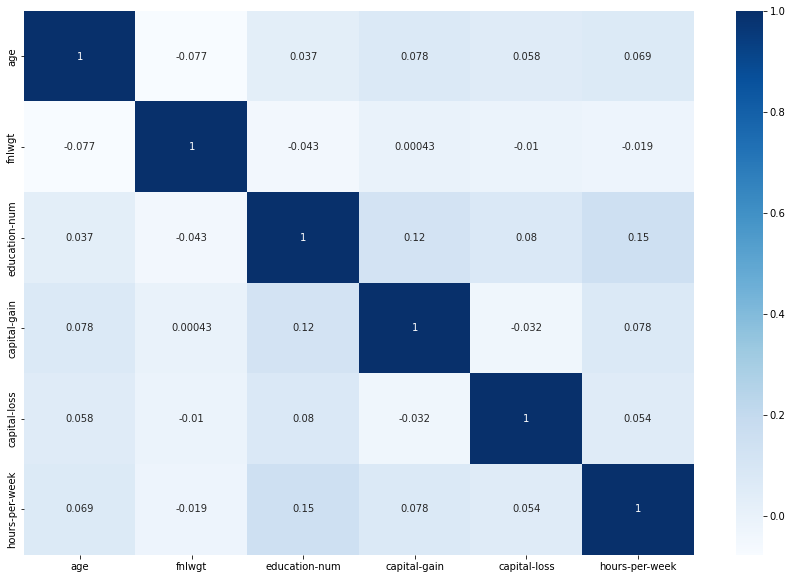

In [ ]:
plt.figure(figsize = (15,10))
sb.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

Как результат, признаки практически не коррелируют друг с другом.

 



In [ ]:
color = ["#3498db","#34495e"]
sb.set_palette(color)

*Посмотрим на какой возраст приходится наибольший заработок*

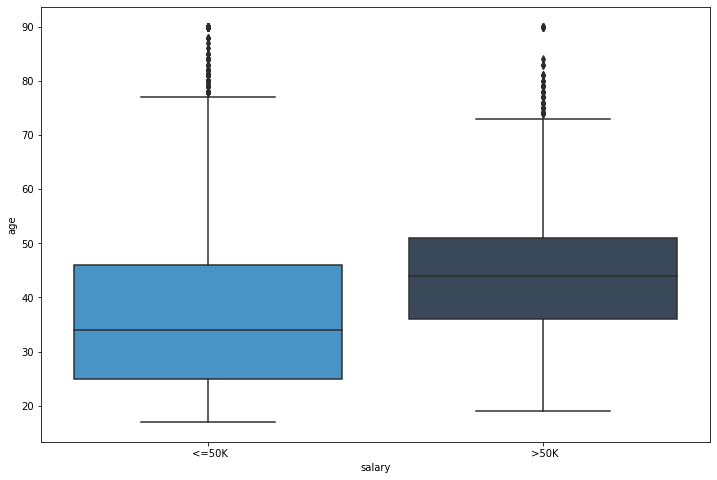

In [ ]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=df, y='age', x='salary')
plt.show()

Можно увидеть, что среди опрошенных, у которых зарплата более 50К, преобладают люди в возрасте примерно от 35 до 50. Зарплату менее 50К получают люди примерно от 25 до 45.

*Посмотрим зависимость заработной платы от характеристики, которая обозначает количество людей со схожими признаками*

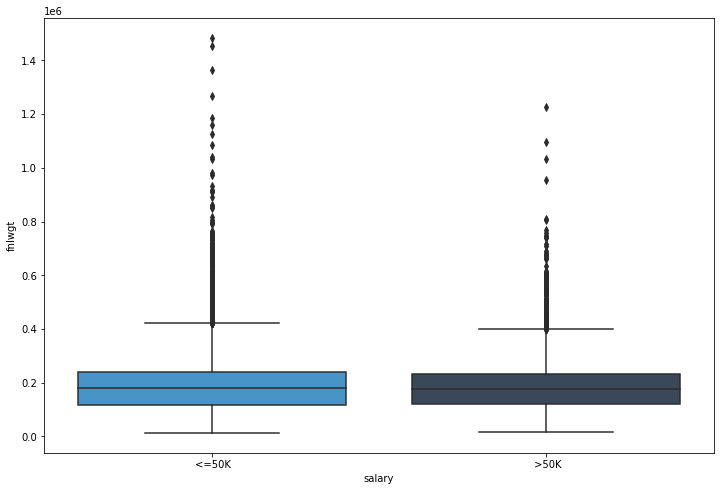

In [ ]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=df, y='fnlwgt', x='salary')
plt.show()

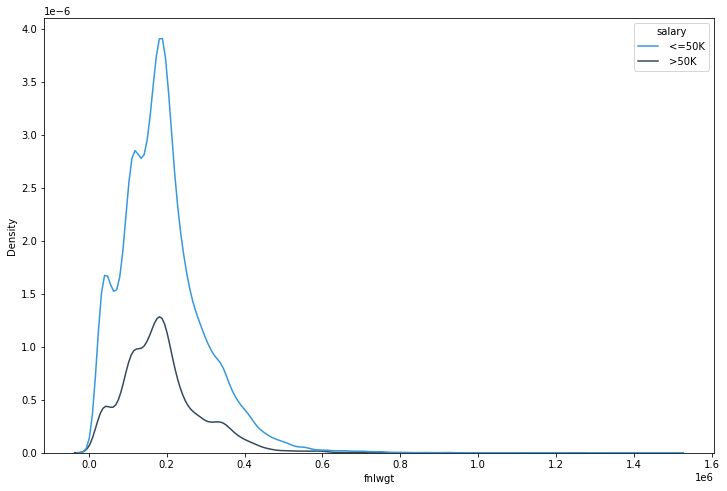

In [ ]:
plt.figure(figsize=(12, 8))
sb.kdeplot(data=df, x='fnlwgt', hue='salary')
plt.show()

Трудно разглядеть зависимость зарплаты от данного признака. Попробуем отбросить его при дальнейшей обработке данных.

*Посмотрим распределение заработной платы по принадлежности к рабочему классу*

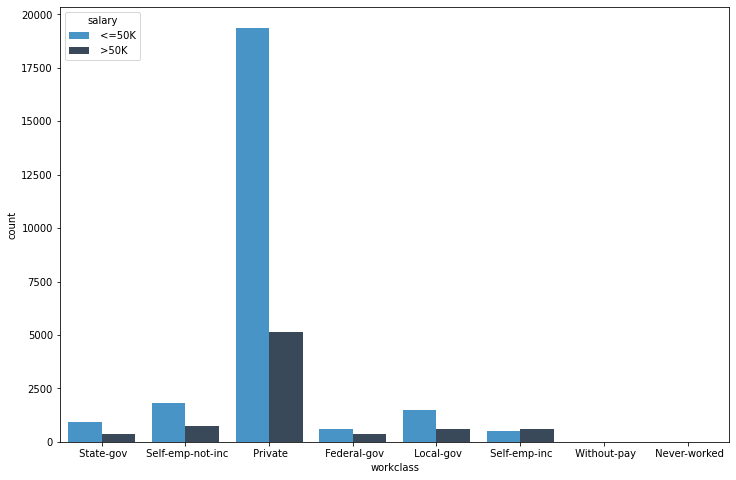

In [ ]:
plt.figure(figsize=(12, 8))
sb.countplot(data=df, x='workclass', hue='salary')
plt.show()

Среди людей рабочего класса можем наблюдать наибольшее количество людей, которые получают зарплату более 50К, кроме того данный класс преобладает и среди тех, кто пролучает зарплату менее 50К. 

*Посмотрим распределение заработной платы среди уровня образования*

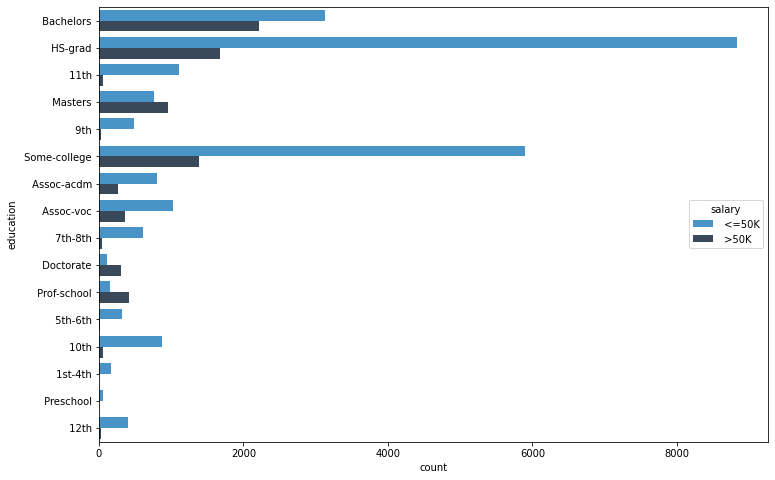

In [ ]:
plt.figure(figsize=(12, 8))
sb.countplot(data=df, y='education', hue='salary')
plt.show()

Очевидно, что уровень образования играет ключевую роль в формировании заработной платы. По графику видно, что большинство тех, кто получает более 50К имеют образование начиная от высшей школы или колледжа и заканчивая магистратурой.

*Посмотрим зависимость заработной платы от семейного положения*

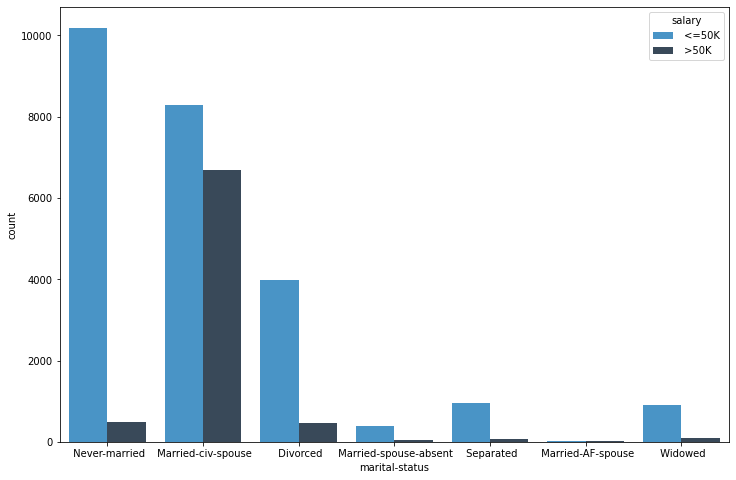

In [ ]:
plt.figure(figsize=(12, 8))
sb.countplot(data=df, x='marital-status', hue='salary')
plt.show()

Большинство тех, кто хорошо зарабатывает, находится в гражданском браке.

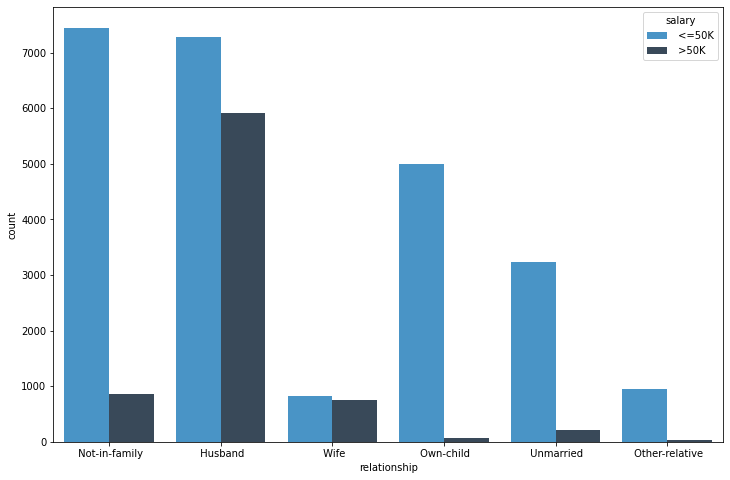

In [ ]:
plt.figure(figsize=(12, 8))
sb.countplot(data=df, x='relationship', hue='salary')
plt.show()

В основном высоким заработком может похвастаться только мужчина.

*Посмотрим зависимость заработной платы от расы*

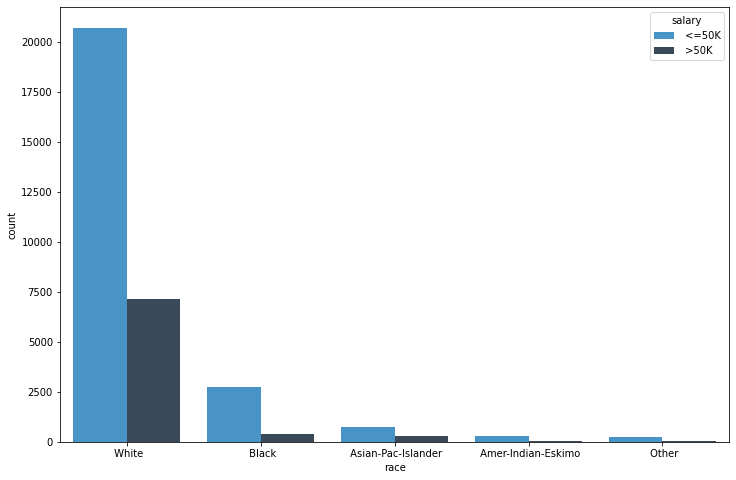

In [ ]:
plt.figure(figsize=(12, 8))
sb.countplot(data=df, x='race', hue='salary')
plt.show()

Хороший заработок в основном характерен для людей «белой расы».

*Посмотрим зависимость заработной платы от пола*

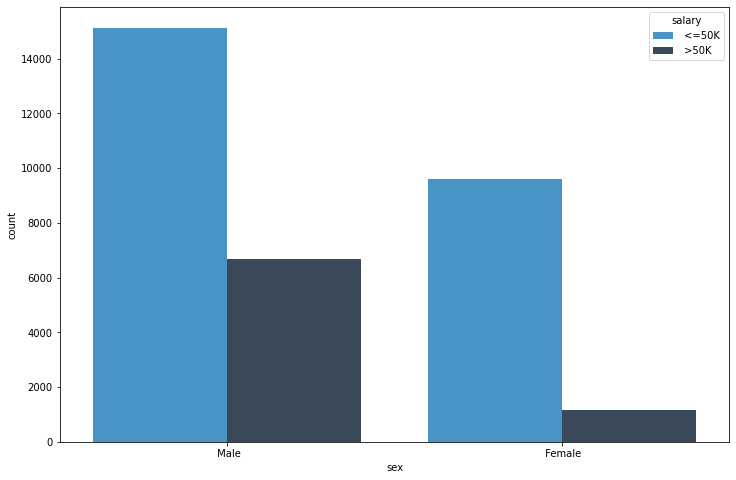

In [ ]:
plt.figure(figsize=(12, 8))
sb.countplot(data=df, x='sex', hue='salary')
plt.show()

Высокий заработок преобладает среди мужчин.

*Посмотрим зависимость заработной платы от прироста или потери капитала*

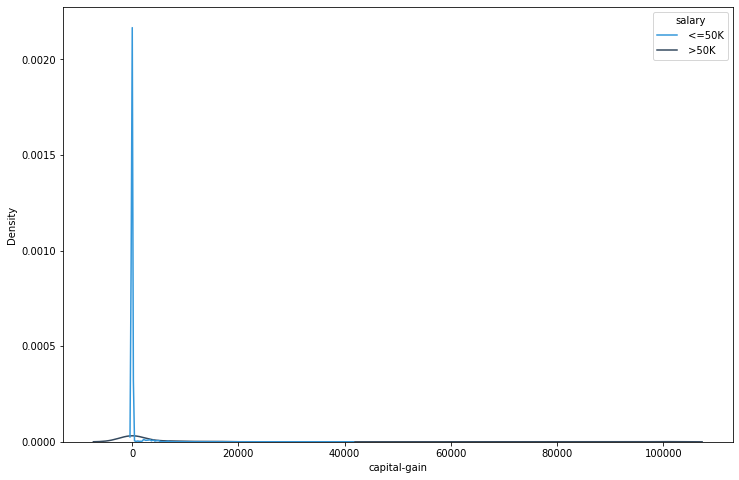

In [ ]:
plt.figure(figsize=(12, 8))
sb.kdeplot(data=df, x='capital-gain', hue='salary')
plt.show()

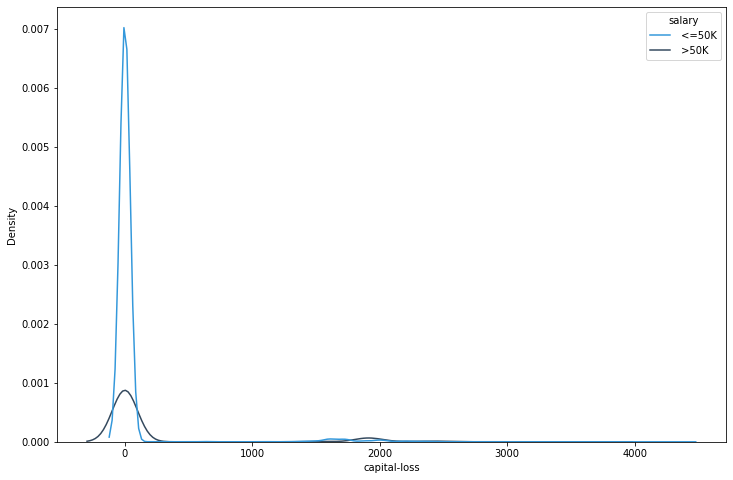

In [ ]:
plt.figure(figsize=(12, 8))
sb.kdeplot(data=df, x='capital-loss', hue='salary')
plt.show()

По графикам можно увидеть, что данные характеристики не оказывают никакого влияния на уровень заработной платы, скорее всего потому что для большинства объектов являются нулём, и не смогут быть полезны при обучении модели. В дальнейшем мы удалим эти признаки.

*Посмотрим зависимость заработной платы от количества отработанных часов в неделю*

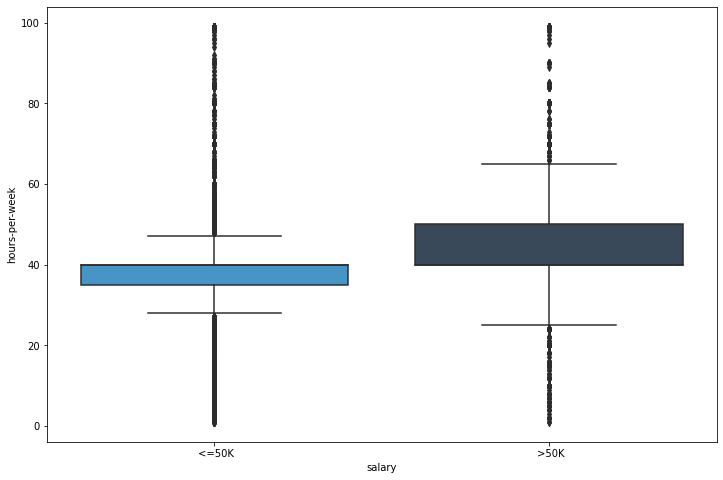

In [ ]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=df, x='salary', y='hours-per-week')
plt.show()

По графикам видно, что работники, которые трудятся более 40 часов в неделю получают зарплату выше, чем те, которые работают менее 40 часов.

##  **5. Обработка данных**

> В данном разделе мы выполним предварительную обработку данных, чтобы они стали пригодны для алгоритмов машинного обучения



#### **5.1. Обработка числовых признаков**

In [ ]:
numeric_parameters

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

Отбросим числовые признаки, которые имеют слишком большое число выбросов (*capital-gain*, *capital-gain*) или дублируют друг друга (*education-num*)

In [ ]:
df.drop('fnlwgt', axis=1, inplace=True)
df.drop('education-num', axis=1, inplace=True)
df.drop('capital-gain', axis=1, inplace=True)
df.drop('capital-loss', axis=1, inplace=True)

К оставшимся числовым признакам применим ***нормализацию***. В данном случае воспользуемся методом `MinMaxScaler()` из библиотеки scikit-learn, который нормализует значения, приводя их к диапазону от 0 до 1

In [ ]:
remaining_numeric_parameters = [column for column in df.columns if df[column].dtype.name != 'object']
remaining_numeric_parameters

['age', 'hours-per-week']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[remaining_numeric_parameters] = scaler.fit_transform(df[remaining_numeric_parameters])

In [ ]:
df.describe()

,age,hours-per-week
count,32561.000000,32561.000000
mean,0.295639,0.402423
std,0.186855,0.125994
min,0.000000,0.000000
25%,0.150685,0.397959
50%,0.273973,0.397959
75%,0.424658,0.448980
max,1.000000,1.000000


#### **5.2. Обработка категориальных признаков**

In [ ]:
category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

Найдем среди категориальных признаков те, которые можно отнести к бинарным и заменим их значения на *0* или *1* соответственно

In [ ]:
binary_category_parameters = [column for column in category_parameters if len(df[column].unique()) == 2]
binary_category_parameters

['sex', 'salary']

In [ ]:
for column in binary_category_parameters:
  df[column] = df[column].map({df[column].unique()[0]: 0, df[column].unique()[1]: 1})

Теперь выберем признаки, которые нельзя классифицировать как бинарные

In [ ]:
no_binary_category_parameters = [column for column in category_parameters if column not in binary_category_parameters]
no_binary_category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'native-country']

Применим к ним ***векторизацию*** — каждый из категориальных признаков, который нельзя отнести к бинарным, заменим на столько новых булевых признаков, сколько существует возможных категорий у данного признака). Данную функциональность представляет метод `get_dummies` из библиотеки Pandas.


In [ ]:
df=pd.get_dummies(df, columns=no_binary_category_parameters, drop_first=True)

##  **6. Разделение данных**

> В данном разделе мы выполним разделение данных на обучающую и тестовую выборки



Разделение будет выполнено в следующем соотношении: **80%** обучающая выборка, **20%** тестовая выборка.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, df.columns != 'salary']
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=17)

In [ ]:
X_train.shape[0]

26048

Количество объектов обучающей выборки = ***26048***

In [ ]:
X_test.shape[0] 

6513

Количество объектов тестовой выборки = ***6513***

##  **7. Классификация**

> В данном разделе мы запустим различные классификаторы, чтобы сравнить получаемые показатели точности и ошибки предсказания



###  **7.1. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Выполним подбор параметра ***K*** (*число ближайших соседей*) для того, чтобы выбрать наиболее лучший вариант

In [ ]:
# scores = []

# for i in range(1, 51, 2):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train, y_train)
#     score = knn.score(X_test, y_test)
#     result = [i, score]
#     scores.append(result)

# scores

[[1, 0.7781360356210656],
 [3, 0.8111469368954399],
 [5, 0.8220482112697681],
 [7, 0.8249654537079687],
 [9, 0.8235836020267158],
 [11, 0.826040227237832],
 [13, 0.826654383540611],
 [15, 0.8277291570704745],
 [17, 0.8288039306003377],
 [19, 0.8281897742975587],
 [21, 0.8275756179947796],
 [23, 0.8297251650545063],
 [25, 0.8309534776600644],
 [27, 0.8309534776600644],
 [29, 0.8307999385843697],
 [31, 0.8291110087517273],
 [33, 0.8274220789190849],
 [35, 0.8269614616920006],
 [37, 0.8277291570704745],
 [39, 0.8272685398433901],
 [41, 0.8294180869031168],
 [43, 0.8309534776600644],
 [45, 0.8307999385843697],
 [47, 0.8306463995086749],
 [49, 0.8295716259788116]]

In [ ]:
# max(scores, key=lambda x: x[1])

[25, 0.8309534776600644]

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=max(scores, key=lambda x: x[1])[0])
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_train_predict = knn.predict(X_train)
knn_accuracy_train = np.mean(y_train == y_train_predict)
knn_err_train = 1 - knn_accuracy_train
print("Точность на обучающей выборке =", knn_accuracy_train)
print("Ошибка на обучающей выборке =", knn_err_train)
print("=================================================")
y_test_predict = knn.predict(X_test)
knn_accuracy_test = np.mean(y_test == y_test_predict)
knn_err_test = 1 - knn_accuracy_test
print("Точность на тестовой выборке =", knn_accuracy_test)
print("Ошибка на тестовой выборке =", knn_err_test)

Точность на обучающей выборке = 0.8445945945945946
Ошибка на обучающей выборке = 0.15540540540540537
Точность на тестовой выборке = 0.8309534776600644
Ошибка на тестовой выборке = 0.16904652233993556


### **7.2. Random Foresеt**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Выполним подбор параметра ***n_estimators*** (*число деревьев*) для того, чтобы выбрать наиболее лучший вариант

In [ ]:
# scores = []

# for i in range(100, 1100, 100):
#     rf = RandomForestClassifier(n_estimators=i)
#     rf.fit(X_train, y_train)
#     score = rf.score(X_test, y_test)
#     result = [i, score]
#     scores.append(result)

# scores

[[100, 0.8120681713496085],
 [200, 0.8106863196683556],
 [300, 0.8114540150468295],
 [400, 0.8120681713496085],
 [500, 0.8116075541225242],
 [600, 0.8128358667280823],
 [700, 0.8122217104253032],
 [800, 0.8114540150468295],
 [900, 0.8122217104253032],
 [1000, 0.8125287885766928]]

In [ ]:
# max(scores, key=lambda x: x[1])

[600, 0.8128358667280823]

In [ ]:
# rf = RandomForestClassifier(n_estimators=max(scores, key=lambda x: x[1])[0])
rf = RandomForestClassifier(n_estimators=600)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [ ]:
rf_accuracy_train = np.mean(y_train == rf.predict(X_train))
rf_err_train = 1 - rf_accuracy_train
print("Точность на обучающей выборке =", rf_accuracy_train)
print("Ошибка на обучающей выборке =", rf_err_train)
print("=================================================")
rf_accuracy_test = np.mean(y_test == rf.predict(X_test))
rf_err_test = 1 - rf_accuracy_test
print("Точность на тестовой выборке =", rf_accuracy_test)
print("Ошибка на тестовой выборке =", rf_err_test)

Точность на обучающей выборке = 0.9699017199017199
Ошибка на обучающей выборке = 0.030098280098280084
Точность на тестовой выборке = 0.812375249500998
Ошибка на тестовой выборке = 0.18762475049900196


### **7.3. Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Выполним подбор параметра ***n_estimators*** (*число деревьев*) для того, чтобы выбрать наиболее лучший вариант

In [ ]:
# scores = []

# for i in range(100, 1100, 100):
#     gb = GradientBoostingClassifier(n_estimators=i)
#     gb.fit(X_train, y_train)
#     score = gb.score(X_test, y_test)
#     result = [i, score]
#     scores.append(result)

# scores

[[100, 0.8340242591739597],
 [200, 0.836480884385076],
 [300, 0.8392445877475817],
 [400, 0.8398587440503608],
 [500, 0.8384768923691079],
 [600, 0.8387839705204975],
 [700, 0.8395516658989712],
 [800, 0.8403193612774451],
 [900, 0.8409335175802242],
 [1000, 0.8403193612774451]]

In [ ]:
# max(scores, key=lambda x: x[1])

[900, 0.8409335175802242]

In [ ]:
# gb = GradientBoostingClassifier(n_estimators=max(scores, key=lambda x: x[1])[0])
gb = GradientBoostingClassifier(n_estimators=900)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=900)

In [ ]:
gb_accuracy_train = np.mean(y_train == gb.predict(X_train))
gb_err_train = 1 - gb_accuracy_train
print("Точность на обучающей выборке =", gb_accuracy_train)
print("Ошибка на обучающей выборке =", gb_err_train)
print("=================================================")
gb_accuracy_test = np.mean(y_test == gb.predict(X_test))
gb_err_test = 1 - gb_accuracy_test
print("Точность на тестовой выборке =", gb_accuracy_test)
print("Ошибка на тестовой выборке =", gb_err_test)

Точность на обучающей выборке = 0.8619471744471745
Ошибка на обучающей выборке = 0.1380528255528255
Точность на тестовой выборке = 0.8409335175802242
Ошибка на тестовой выборке = 0.15906648241977583


### **7.4. Ada Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

Выполним подбор параметра ***n_estimators*** (*число деревьев*) для того, чтобы выбрать наиболее лучший вариант

In [ ]:
# scores = []

# for i in range(100, 1100, 100):
#     ada = AdaBoostClassifier(n_estimators=i)
#     ada.fit(X_train, y_train)
#     score = ada.score(X_test, y_test)
#     result = [i, score]
#     scores.append(result)

# scores

[[100, 0.833256563795486],
 [200, 0.8337171810225702],
 [300, 0.8346384154767388],
 [400, 0.8352525717795178],
 [500, 0.8355596499309074],
 [600, 0.8358667280822969],
 [700, 0.8357131890066022],
 [800, 0.8350990327038231],
 [900, 0.8347919545524336],
 [1000, 0.8344848764010441]]

In [ ]:
# max(scores, key=lambda x: x[1])

[600, 0.8358667280822969]

In [ ]:
# ada = AdaBoostClassifier(n_estimators=max(scores, key=lambda x: x[1])[0])
ada = AdaBoostClassifier(n_estimators=600)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=600)

In [ ]:
ada_accuracy_train = np.mean(y_train == ada.predict(X_train))
ada_err_train = 1 - ada_accuracy_train
print("Точность на обучающей выборке =", ada_accuracy_train)
print("Ошибка на обучающей выборке =", ada_err_train)
print("=================================================")
ada_accuracy_test = np.mean(y_test == ada.predict(X_test))
ada_err_test = 1 - ada_accuracy_test
print("Точность на тестовой выборке =", ada_accuracy_test)
print("Ошибка на тестовой выборке =", ada_err_test)

Точность на обучающей выборке = 0.8409474815724816
Ошибка на обучающей выборке = 0.15905251842751844
Точность на тестовой выборке = 0.8358667280822969
Ошибка на тестовой выборке = 0.1641332719177031


### **7.5. Extra Trees**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

Выполним подбор параметра ***n_estimators*** (*число деревьев*) для того, чтобы выбрать наиболее лучший вариант

In [ ]:
# scores = []

# for i in range(100, 1100, 100):
#     et = AdaBoostClassifier(n_estimators=i)
#     et.fit(X_train, y_train)
#     score = et.score(X_test, y_test)
#     result = [i, score]
#     scores.append(result)

# scores

[[100, 0.833256563795486],
 [200, 0.8337171810225702],
 [300, 0.8346384154767388],
 [400, 0.8352525717795178],
 [500, 0.8355596499309074],
 [600, 0.8358667280822969],
 [700, 0.8357131890066022],
 [800, 0.8350990327038231],
 [900, 0.8347919545524336],
 [1000, 0.8344848764010441]]

In [ ]:
# max(scores, key=lambda x: x[1])

[600, 0.8358667280822969]

In [ ]:
# et = AdaBoostClassifier(n_estimators=max(scores, key=lambda x: x[1])[0])
et = AdaBoostClassifier(n_estimators=600)
et.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=600)

In [ ]:
et_accuracy_train = np.mean(y_train == et.predict(X_train))
et_err_train = 1 - et_accuracy_train
print("Точность на обучающей выборке =", et_accuracy_train)
print("Ошибка на обучающей выборке =", et_err_train)
print("=================================================")
et_accuracy_test = np.mean(y_test == et.predict(X_test))
et_err_test = 1 - et_accuracy_test
print("Точность на тестовой выборке =", et_accuracy_test)
print("Ошибка на тестовой выборке =", et_err_test)

Точность на обучающей выборке = 0.8409474815724816
Ошибка на обучающей выборке = 0.15905251842751844
Точность на тестовой выборке = 0.8358667280822969
Ошибка на тестовой выборке = 0.1641332719177031


### Итоговая таблица

Соберём полученные характеристики точности и ошибки предсказания в итоговую таблицу

In [ ]:
index = ['KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 'ExtraTreesClassifier']

train_acc_arr = [knn_accuracy_train, rf_accuracy_train, gb_accuracy_train, ada_accuracy_train, et_accuracy_train]
test_acc_arr = [knn_accuracy_test, rf_accuracy_test, gb_accuracy_test, ada_accuracy_test, et_accuracy_test]
train_err_arr = [knn_err_train, rf_err_train, gb_err_train, ada_err_train, et_err_train]
test_err_arr = [knn_err_test, rf_err_test, gb_err_test, ada_err_test, et_err_test]

train_acc = pd.Series(train_acc_arr, index, name='Train_Accuracy')
test_acc = pd.Series(test_acc_arr, index, name='Test_Accuracy')
train_err = pd.Series(train_err_arr, index, name='Train_Error')
test_err = pd.Series(test_err_arr, index, name='Test_Error')

pd.concat([train_acc, train_err, test_acc, test_err], axis=1).sort_values(by=['Test_Error'])

,Train_Accuracy,Train_Error,Test_Accuracy,Test_Error
GradientBoostingClassifier,0.861947,0.138053,0.840934,0.159066
AdaBoostClassifier,0.840947,0.159053,0.835867,0.164133
ExtraTreesClassifier,0.840947,0.159053,0.835867,0.164133
KNeighborsClassifier,0.844595,0.155405,0.830953,0.169047
RandomForestClassifier,0.969902,0.030098,0.812375,0.187625


##  **Выводы**

В результате проделанной работы можно сделать вывод о том, что классификатор `GradientBoostingClassifier` показал самую высокую точность предсказания — около 84% на тестовой выборке. Также стоит отметить, что классификаторы `AdaBoostClassifier` и `ExtraTreesClassifier` показали абсолютно одинаковые результаты как на обучающей, так и на тестовой выборке. Абсолютным лидером предсказания на обучающей выборке является `RandomForestClassifier`c ошибкой около 3%. Показатели всех классификаторов на тестовой выборке особо сильно не различаются, улучшить результаты предсказания не помог даже подбор лучшего параметра. Скорее всего полученные результаты можно улучшить, если мы будем иметь гораздо больше данных, что позволит обучить модель классификатора гораздо лучше.